In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist["data"], mnist["target"] # X, y: pandas DataFrame
X, y = X.to_numpy(), y.to_numpy() # X, y: numpy array
y = y.astype(np.uint8)

In [4]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train_, test_size=0.25, random_state=42)
#train : vaild : test = 6 : 2 : 2 

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [6]:
sgd_clf.score(X_valid,y_valid)

0.8640714285714286

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import math
import time

def plot_learning_curves(model, X_t, X_v, y_t, y_v):
    X_train, X_valid, y_train, y_valid = X_t, X_v, y_t, y_v
    train_errors, valid_errors = [], []
    for m in range (6000, 42001, 6000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_valid_predict = model.predict(X_valid)
        train_errors.append(mse(y_train[:m], y_train_predict))
        valid_errors.append(mse(y_valid, y_valid_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train_set")
    plt.plot(np.sqrt(valid_errors), "b-", linewidth = 3, label = "valid_set")
    plt.legend(loc="upper right", fontsize = 14)
    plt.xlabel("train_set_size", fontsize = 14)
    plt.ylabel("RMSE", fontsize = 14)
    


SGD Classifier학습 시간: 292.650 sec


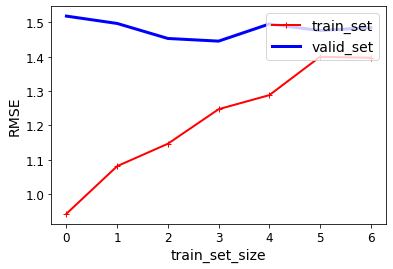

In [8]:
start = time.time()
plot_learning_curves(sgd_clf, X_train, X_valid, y_train, y_valid)
end = time.time()

print(f"SGD Classifier학습 시간: {end - start:.3f} sec")

plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
import math
import time

sgd1_clf = SGDClassifier(random_state=42)
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'max_iter':[100,200,300,400,500,1000,1500,2000]}
  ]
grid_search = GridSearchCV(sgd_clf, param_grid,
                           n_jobs = -1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [10]:
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

print(f"Grid Search 학습 시간: {end - start:.3f} sec")

Grid Search 학습 시간: 655.888 sec


In [11]:
grid_search.best_estimator_

SGDClassifier(max_iter=300, random_state=42)

In [15]:
sgd_clf_1 = SGDClassifier(max_iter=300, tol=1e-3, random_state=42, n_jobs = -1)
sgd_clf_1.fit(X_train, y_train)

SGDClassifier(max_iter=300, n_jobs=-1, random_state=42)

In [16]:
sgd_clf_1.score(X_valid, y_valid)

0.8640714285714286

In [ ]:
start = time.time()
plot_learning_curves(sgd_clf_1, X_train, X_valid, y_train, y_valid)
end = time.time()

print(f"Grid Search를 이용한 Hyperparameter를 적용한 SGD Classifier학습 시간: {end - start:.3f} sec")

plt.show()